In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
import warnings
# import optuna


# PHASE 0


In [2]:
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
data2 = data.copy()
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


PHASE 1 - BOXPLOT

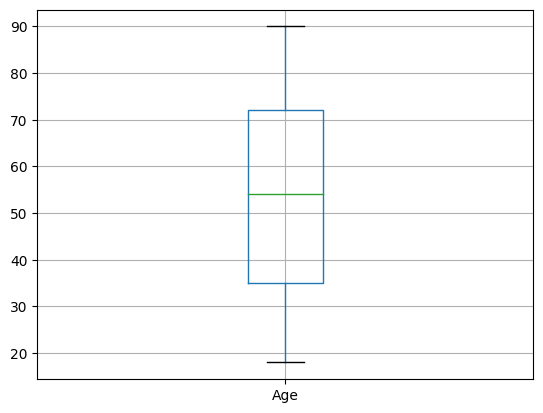

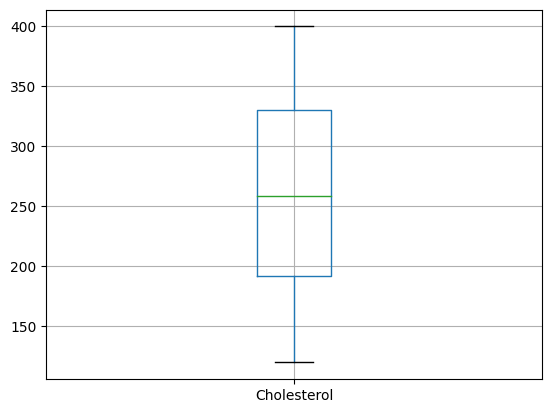

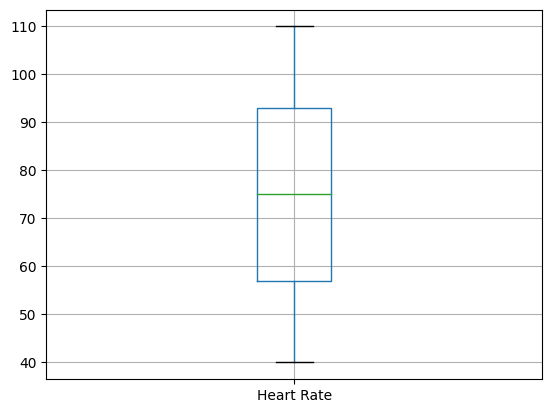

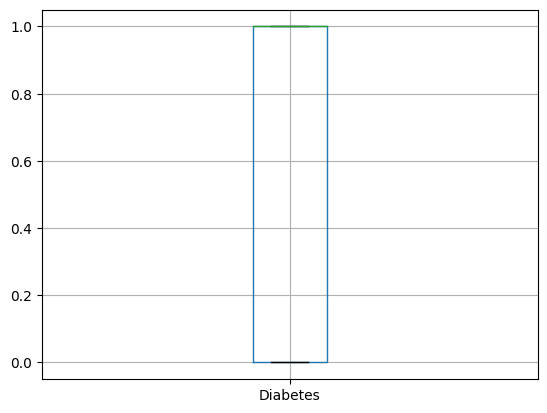

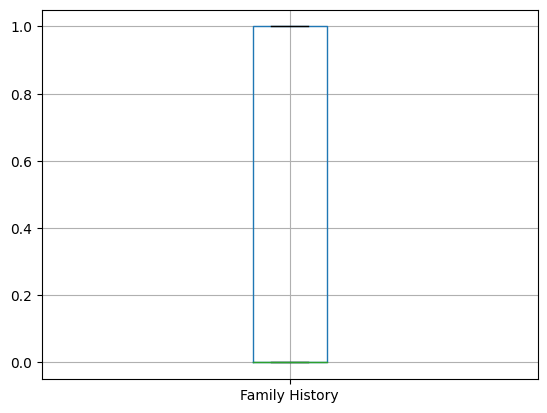

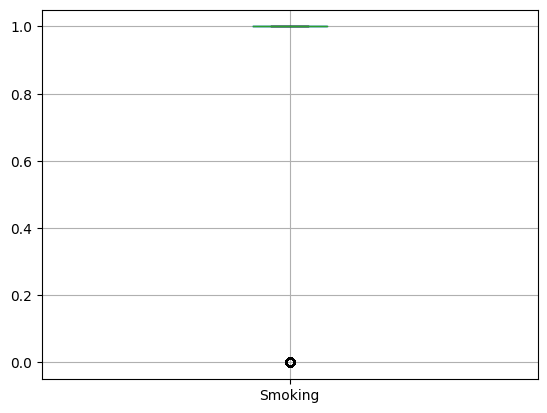

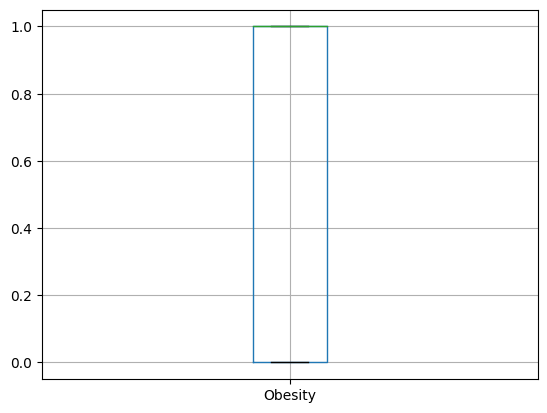

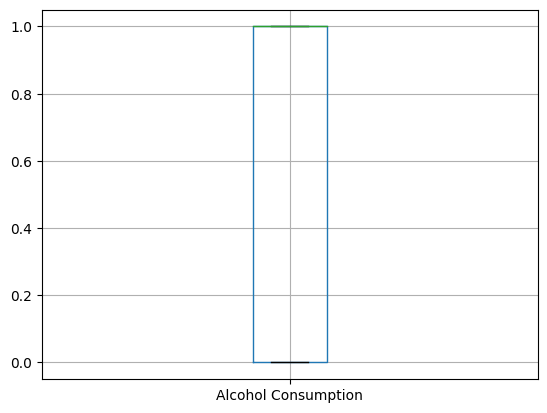

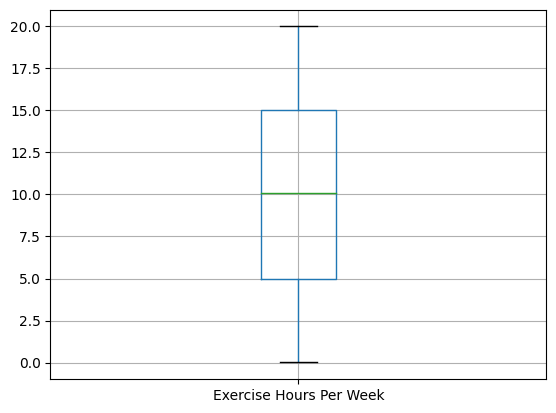

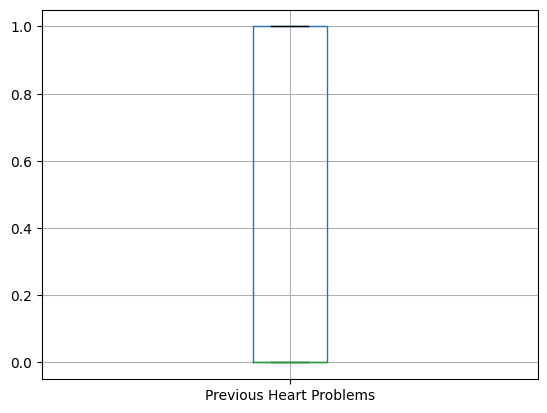

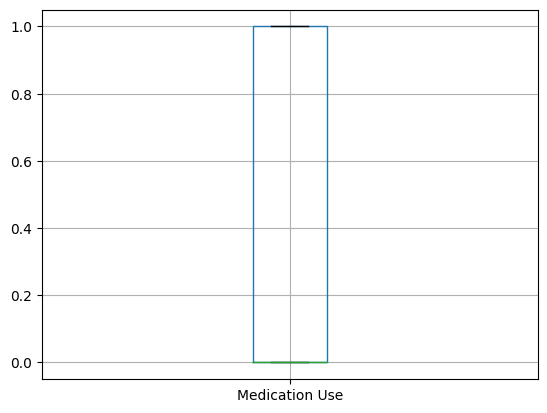

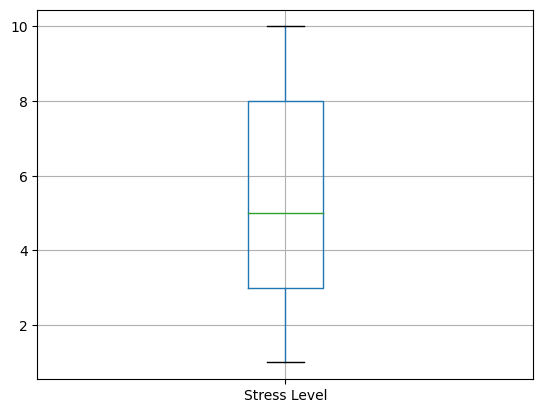

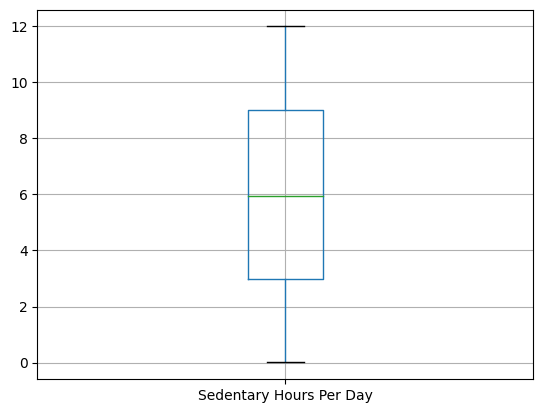

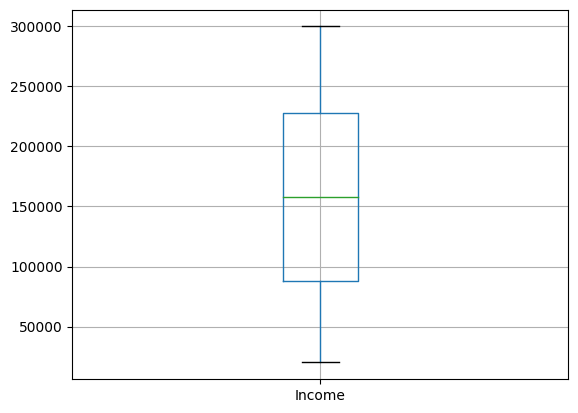

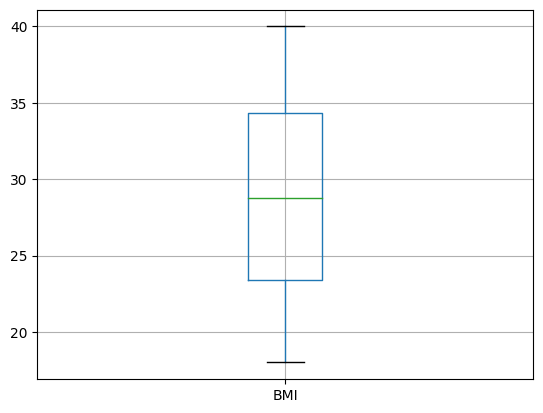

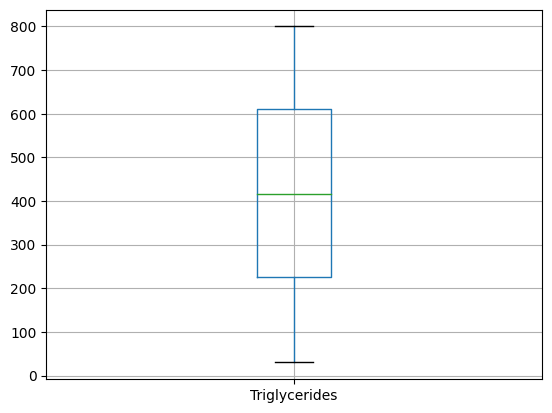

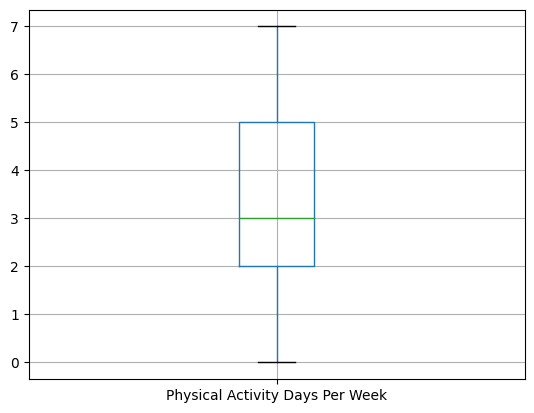

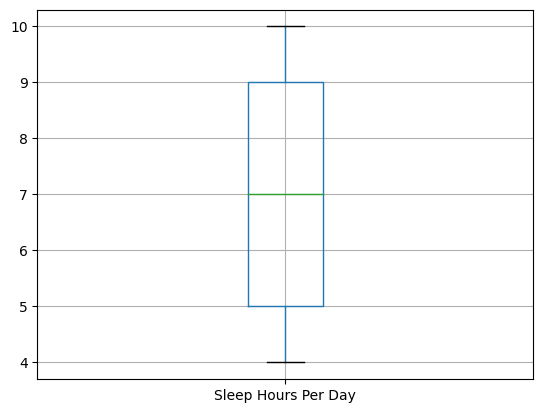

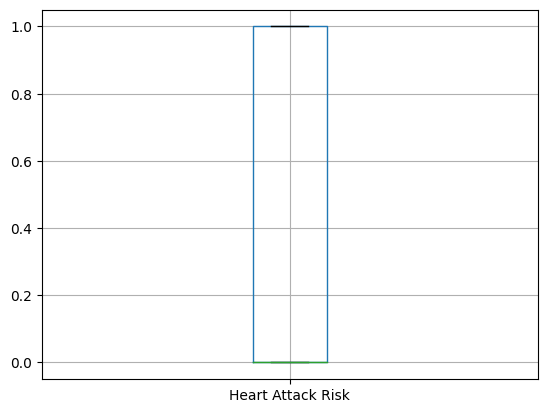

In [3]:
for x in data2:
    if data2[x].dtype != 'O':
        box = data2.boxplot(column=[x])
        plt.show(box)


#PHASE 1
calculate:
mode,
outlier,
type
value range
and concat them on one table


In [4]:
mode_df = data2.mode()
data_types = data2.dtypes.values
outliers_df = pd.DataFrame()
outliers_count = {}
# for column in data2.columns:
#     if data2[column].dtype in ['int64', 'float64']:
#         Q1 = data2[column].quantile(0.25)
#         Q3 = data2[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = data2[(data2[column] < lower_bound) | (data2[column] > upper_bound)]
#         outliers_count[column] = len(outliers)
for column in data2.columns:
    if data2[column].dtype in ['int64', 'float64'] and not (data2[column].nunique() == 2 and set(data2[column].unique()) == {0, 1}):
        Q1 = data2[column].quantile(0.25)
        Q3 = data2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data2[(data2[column] < lower_bound) | (data2[column] > upper_bound)]
        outliers_count[column] = len(outliers)


dataf = pd.DataFrame({'mode': mode_df.iloc[0], 'outliers': outliers_count, 'Type': data_types}, index=data2.columns)
finaldf = pd.concat([data2.describe().T, dataf], axis=1)

min_minus_max = finaldf['max'] - finaldf['min']
dataf2 = pd.DataFrame({'Value range': min_minus_max}, index=data2.columns)
lastdf = pd.concat([data2.describe().T, dataf, dataf2], axis=1)

lastdf

,count,mean,std,min,25%,50%,75%,max,mode,outliers,Type,Value range
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000,90.0,0.0,int64,72.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000,235.0,0.0,int64,280.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000,94.0,0.0,int64,70.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,NaN,int64,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,NaN,int64,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,int64,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,NaN,int64,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,NaN,int64,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709,0.002442,0.0,float64,19.996267
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,NaN,int64,1.000000


In [5]:
# CORRELATION
harcorr = data2.corr().sort_values(by='Heart Attack Risk',ascending=False)
columns_corr = harcorr.index[1:7]
columns_corr


<ipython-input-5-5e0638041c0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  harcorr = data2.corr().sort_values(by='Heart Attack Risk',ascending=False)


Index(['Cholesterol', 'Diabetes', 'Exercise Hours Per Week', 'Triglycerides',
       'Income', 'Age'],
      dtype='object')

In [ ]:
data2['Heart Attack Risk'].corr(data2['Cholesterol'])


0.019339677892136222

In [ ]:
data2['Heart Attack Risk'].corr(data2['Diabetes'])


0.017225295711578846

In [ ]:
data2['Heart Attack Risk'].corr(data2['Exercise Hours Per Week'])


0.011132824047779148

In [ ]:
data2['Heart Attack Risk'].corr(data2['Triglycerides'])


0.010471454380795678

In [ ]:
data2['Heart Attack Risk'].corr(data2['Income'])

0.009627602189392792

#PHASE 2
Calculate:
#validity
#null values
#completeness
#number of records

In [6]:
import re

#validity-patient id
valid_id=data2['Patient ID']
pattern = r'^[A-Z]+[0-9]+$'
valid_ids = sum(1 for patient_id in valid_id if re.match(pattern, patient_id))
validity_id = (valid_ids / len(valid_id)) * 100
print('patient id validity:')
print(validity_id)
# validity - age
valid_age_mask = data2['Age'].between(1, 99)
validity_age = (valid_age_mask.mean())*100

# validity - sex
valid_sex=data2['Sex']
valid_sex_values = ['Male', 'Female']
invalid_sex_values = valid_sex[~valid_sex.isin(valid_sex_values)]
validity_sex = (1 - (len(invalid_sex_values) / len(valid_sex)))*100

#validity - Cholesterol
is_numeric = pd.to_numeric(data2['Cholesterol'], errors='coerce').notnull()
is_valid_range=data2['Cholesterol'].between(100,400)
validity_choles=(is_numeric & is_valid_range).mean()*100

# validity - blood pressure
valid_bloodp = data2['Blood Pressure']
split_blood_pressure = valid_bloodp.str.split('/', expand=True)
systolic_values = pd.to_numeric(split_blood_pressure[0])
diastolic_values = pd.to_numeric(split_blood_pressure[1])

valid_systolic_range = (80, 190)
valid_diastolic_range = (50, 110)

invalid_systolic_values = systolic_values[(systolic_values < valid_systolic_range[0]) | (systolic_values > valid_systolic_range[1])]
invalid_diastolic_values = diastolic_values[(diastolic_values < valid_diastolic_range[0]) | (diastolic_values > valid_diastolic_range[1])]

validity_systolic = (1 - (len(invalid_systolic_values) / len(systolic_values)))*100
validity_diastolic = (1 - (len(invalid_diastolic_values) / len(diastolic_values)))*100


#validity-Heart Rate
valid_heart = data2['Heart Rate']
valid_heart_rate_range = (40, 120)
invalid_heart_rate_values = valid_heart[(valid_heart < valid_heart_rate_range[0]) | (valid_heart > valid_heart_rate_range[1])]

validity_heart_rate = (1 - (len(invalid_heart_rate_values) / len(valid_heart)))*100

#validity-Diabetes
valid_dia=data2['Diabetes'].between(0,1)
validity_dia = valid_dia.mean()*100


#validity-Family History
valid_fam=data2['Family History'].between(0,1)
validity_fam = valid_fam.mean()*100

# validity-Smoking
valid_smk=data2['Smoking'].between(0,1)
validity_smk = valid_smk.mean()*100

# validity-Obesity
valid_ob=data2['Obesity'].between(0,1)
validity_ob = valid_ob.mean()*100

# validity-Alcohol Consumption
valid_alc=data2['Alcohol Consumption'].between(0,1)
validity_alc = valid_alc.mean()*100

# validity-Exercise Hours Per Week
exercise_hours = data2['Exercise Hours Per Week']
valid_count = 0
total_count = 0
for value in exercise_hours:
    if isinstance(value, float) and value >= 0:
        valid_count += 1
    total_count += 1
validity_eh = (valid_count / total_count) * 100

# validity-Diet
diet_column = data2['Diet']

valid_diet_categories = ['Healthy', 'Unhealthy', 'Average']

invalid_diet_values = diet_column[~diet_column.isin(valid_diet_categories)]

validity_diet = (1 - (len(invalid_diet_values) / len(diet_column)))*100

# validity-Previous Heart Problems
valid_php=data2['Previous Heart Problems'].between(0,1)
validity_php = valid_php.mean()*100

# validity-Medication Use
valid_mu=data2['Medication Use'].between(0,1)
validity_mu = valid_mu.mean()*100

# Stress Level
stress_column = data2['Stress Level'].between(0,10)
validity_st = stress_column.mean()*100


# Sedentary
sedentary_column = data2['Sedentary Hours Per Day']
valid_sedentary_range = (0, 12)
invalid_sedentary_values = sedentary_column[(sedentary_column < valid_sedentary_range[0]) | (sedentary_column > valid_sedentary_range[1])]
validity_sedentary = (1 - (len(invalid_sedentary_values) / len(sedentary_column)))*100


# income
income_column = data2['Income']
valid_income_range = (0, 300000)
invalid_income_values = income_column[(income_column < valid_income_range[0]) | (income_column > valid_income_range[1])]
validity_income = (1 - (len(invalid_income_values) / len(income_column)))*100


# BMI
bmi_column = data2['BMI'].between(18,40)

validity_bmi = bmi_column.mean()*100

# Triglycerides
Triglycerides_column = data2['Triglycerides'].between(30,800)

validity_tri = Triglycerides_column.mean()*100


# Physical Activity Days Per Week
pad_column = data2['Physical Activity Days Per Week'].between(0,7)

validity_pad = pad_column.mean()*100

# Sleep Hours Per Day
shpd_column = data2['Sleep Hours Per Day'].between(0,10)
validity_shpd = shpd_column.mean()*100


# country
country_column = data2['Country']
valid_country_mask = country_column.apply(lambda x: isinstance(x, str) and any(c.isalpha() for c in x))
validity_country = valid_country_mask.mean()*100

# Continent
continent_column = data2['Continent']
valid_continents = ['North America', 'South America', 'Europe', 'Asia', 'Africa', 'Australia', 'Antarctica']
invalid_continents = continent_column[~continent_column.isin(valid_continents)]
validity_continent = (1 - (len(invalid_continents) / len(continent_column)))*100

# Hemisphere
hemisphere_column = data2['Hemisphere']
valid_hemispheres = ['Northern Hemisphere', 'Southern Hemisphere']
invalid_hemispheres = hemisphere_column[~hemisphere_column.isin(valid_hemispheres)]
validity_hemisphere = (1 - (len(invalid_hemispheres) / len(hemisphere_column)))*100

# validity-Heart Attack Risk
valid_har=data2['Heart Attack Risk'].between(0,1)
validity_har = valid_har.mean()*100

# null val
null_count = data2.isnull().sum()

# completeness
completeness = data2.count() / len(data2)
cmpl=completeness*100

# number of records
record_counts = data2.count()

# Create DataFrame
validity = [validity_id,validity_age, validity_sex, validity_choles, validity_systolic, validity_heart_rate,
        validity_dia, validity_fam, validity_smk, validity_ob, validity_alc,validity_eh,validity_diet,
            validity_php, validity_mu,validity_st,validity_sedentary,validity_income,validity_bmi,validity_tri,
            validity_pad,validity_shpd,validity_country,validity_continent,validity_hemisphere,validity_har]

dataf = pd.DataFrame({'completeness': cmpl, 'null values': null_count,'validity':validity, 'record count':record_counts}, index=data2.columns)
lastdf = pd.concat([data2.describe().T, dataf], axis=1)
lastdf


patient id validity:
99.94294191486934


,count,mean,std,min,25%,50%,75%,max,completeness,null values,validity,record count
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000,100.0,0,100.000000,8763
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000,100.0,0,100.000000,8763
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000,100.0,0,100.000000,8763
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000,100.0,0,100.000000,8763
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000,100.0,0,100.000000,8763
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000,100.0,0,100.000000,8763
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000,100.0,0,100.000000,8763
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000,100.0,0,100.000000,8763
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709,100.0,0,100.000000,8763
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000,100.0,0,100.000000,8763


PHASE 2
calculate:
#inconsistency

Blood pressure and Cholesterol

In [7]:
bloodp = data2['Blood Pressure']
split_blood_pressure = bloodp.str.split('/', expand=True)
systolic_values = pd.to_numeric(split_blood_pressure[0])
diastolic_values = pd.to_numeric(split_blood_pressure[1])
Cholesterol_filtered_df = data2[(data2['Cholesterol'] > 240) & (systolic_values < 120)  & (diastolic_values < 80)]
Cholesterol_filtered_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
10,HSD6283,73,Female,373,107/69,97,1,1,1,0,...,8.919879,50030,22.867911,469,0,4,South Africa,Africa,Southern Hemisphere,0
28,FFF6730,79,Female,328,113/78,74,0,0,1,0,...,5.209267,98663,31.633196,482,4,6,China,Asia,Northern Hemisphere,0
35,FLG2019,52,Female,360,94/60,106,1,0,1,1,...,7.695640,135099,27.095853,743,4,5,New Zealand,Australia,Southern Hemisphere,1
47,UBJ2564,70,Female,279,102/76,86,0,0,1,1,...,1.090400,191558,29.970809,792,4,6,Japan,Asia,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,GOR6731,76,Male,347,99/64,75,1,0,1,0,...,3.555172,102881,34.193579,696,1,4,Japan,Asia,Northern Hemisphere,1
8710,VNB9587,27,Female,343,99/75,84,1,0,0,1,...,8.774984,160713,22.710059,546,0,9,Canada,North America,Northern Hemisphere,0
8722,PKV6924,26,Male,259,106/64,107,0,0,1,0,...,7.581411,76190,23.252114,653,3,5,South Africa,Africa,Southern Hemisphere,0
8744,VXA0409,83,Male,322,91/69,67,1,1,1,0,...,11.155505,277472,28.873162,518,6,6,Vietnam,Asia,Northern Hemisphere,1


between BMI and Obesity

In [8]:
bmi_obes = data2[(data2['BMI'] > 30) & (data2['Obesity'] == 0)]
bmi_obes

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
15,DCY3282,73,Male,122,114/88,97,1,1,1,0,...,10.086479,265839,36.524395,773,5,8,Italy,Europe,Southern Hemisphere,1
22,LBY7992,50,Male,359,175/60,97,0,1,1,0,...,4.045831,278301,34.651090,358,4,8,Spain,Europe,Southern Hemisphere,0
28,FFF6730,79,Female,328,113/78,74,0,0,1,0,...,5.209267,98663,31.633196,482,4,6,China,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,MDG8156,28,Male,220,146/68,56,1,0,1,0,...,1.111672,232535,35.237031,31,6,6,Spain,Europe,Southern Hemisphere,1
8737,TZL7940,25,Male,382,140/92,76,0,0,1,0,...,4.942414,94686,33.038153,784,4,5,Brazil,South America,Southern Hemisphere,1
8742,AEX7905,35,Male,323,164/74,84,1,0,1,0,...,11.389512,174193,34.378134,761,5,5,Australia,Australia,Southern Hemisphere,0
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,0


between Exercise Hours Per Week and Physical Activity Days Per Week

In [9]:
pad_ehpw = data2[((data2['Physical Activity Days Per Week'] == 0) & (data2['Exercise Hours Per Week'] > 0)) |
                      ((data2['Physical Activity Days Per Week'] == 1) & (data2['Exercise Hours Per Week'] == 0))]
pad_ehpw

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
10,HSD6283,73,Female,373,107/69,97,1,1,1,0,...,8.919879,50030,22.867911,469,0,4,South Africa,Africa,Southern Hemisphere,0
17,COP0566,38,Male,166,120/74,56,1,0,1,1,...,3.660749,48376,29.517388,402,0,6,Thailand,Asia,Northern Hemisphere,0
23,RDI3071,84,Male,202,173/109,81,1,1,1,0,...,7.118935,95237,29.634111,526,0,9,Brazil,South America,Southern Hemisphere,0
31,NXO4034,25,Male,197,178/72,45,0,1,1,0,...,1.419888,59634,18.522199,661,0,6,Spain,Europe,Southern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,OJX0027,88,Male,126,119/87,98,1,1,1,1,...,5.546040,67712,29.917673,206,0,6,India,Asia,Northern Hemisphere,0
8703,JKF6770,52,Female,129,174/97,78,1,0,1,1,...,2.488959,94013,28.367620,335,0,10,Japan,Asia,Northern Hemisphere,1
8710,VNB9587,27,Female,343,99/75,84,1,0,0,1,...,8.774984,160713,22.710059,546,0,9,Canada,North America,Northern Hemisphere,0
8735,HQE8147,43,Male,128,107/105,94,1,0,1,0,...,5.502017,181445,19.321220,526,0,7,Germany,Europe,Northern Hemisphere,0


Blood pressure

In [10]:
bloodp = data2[data2['Blood Pressure'].str.split('/', expand=True)[0].astype(int) < data2['Blood Pressure'].str.split('/', expand=True)[1].astype(int)]
bloodp

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
34,DDG3686,42,Male,360,103/107,44,1,0,1,1,...,9.580940,94144,29.701877,586,1,4,India,Asia,Northern Hemisphere,1
107,ERP9347,80,Male,334,105/108,110,0,0,1,0,...,4.753118,51385,31.362314,530,0,9,United Kingdom,Europe,Northern Hemisphere,0
154,YJM3019,28,Male,209,98/109,81,1,0,1,1,...,11.163903,28245,28.962687,167,3,9,South Korea,Asia,Northern Hemisphere,1
161,EIH9699,41,Male,398,96/106,56,1,0,1,1,...,1.749006,196083,33.625390,141,0,7,Vietnam,Asia,Northern Hemisphere,1
200,JTS2700,78,Male,299,90/105,66,0,1,1,0,...,2.648656,280881,18.333632,218,5,6,Australia,Australia,Southern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,DFE7439,65,Female,244,96/102,62,0,0,1,0,...,5.562740,225250,34.413850,93,1,8,Spain,Europe,Southern Hemisphere,0
8689,LAC0889,24,Male,262,97/108,93,1,0,1,0,...,11.307666,80431,35.349263,331,2,10,Italy,Europe,Southern Hemisphere,0
8724,WFO1019,29,Male,280,106/107,90,1,1,1,1,...,6.496817,50237,29.024055,423,5,5,Vietnam,Asia,Northern Hemisphere,0
8730,GER0333,27,Female,319,96/99,53,1,1,0,1,...,7.323857,154918,32.643967,557,6,7,Canada,North America,Northern Hemisphere,1


Previous Heart Problems and Medication use

In [11]:
php_Mu = data2[(data2['Previous Heart Problems'] == 1) & (data2['Medication Use'] == 0) |
                            (data2['Previous Heart Problems'] == 0) & (data2['Medication Use'] == 1)]
php_Mu

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
14,VTW9069,88,Male,297,112/81,102,1,1,1,0,...,10.425490,165300,25.491741,635,3,6,China,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,6.766948,50533,35.074391,191,3,10,Spain,Europe,Southern Hemisphere,0
8749,GNE7873,60,Male,156,111/96,83,1,1,1,0,...,6.189673,291495,26.605383,572,1,10,South Africa,Africa,Southern Hemisphere,0
8752,UBM5982,65,Male,150,152/99,106,1,0,1,0,...,7.325356,55934,22.710546,83,1,5,Argentina,South America,Southern Hemisphere,0
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1


Triglycerides and previous heart problems


In [12]:
Triglycerides_pha = data2[(data2['Triglycerides'] < 150) & (data2['Previous Heart Problems'] == 1)]
Triglycerides_pha

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
16,DXB2434,69,Male,379,173/75,40,1,1,1,1,...,9.060509,267997,28.332747,68,3,6,Brazil,South America,Southern Hemisphere,0
53,IKY4481,67,Male,222,159/79,105,1,1,1,1,...,0.861540,286299,37.258748,92,0,8,Australia,Australia,Southern Hemisphere,0
59,WAR7163,72,Male,377,144/98,61,1,1,1,1,...,3.476703,249614,28.514638,106,1,10,Japan,Asia,Northern Hemisphere,1
64,TQT8266,53,Male,133,161/108,110,1,1,1,1,...,2.094265,182477,27.681792,67,4,9,Canada,North America,Northern Hemisphere,0
75,DHP4080,55,Male,163,139/107,63,0,0,1,1,...,9.351067,158030,26.608767,131,0,7,Australia,Australia,Southern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,NTL8842,45,Female,166,98/60,63,0,0,1,1,...,10.345259,87050,29.640828,74,1,6,New Zealand,Australia,Southern Hemisphere,0
8747,BBS4075,24,Male,396,118/89,45,0,0,1,1,...,11.467868,219922,38.436301,51,1,8,China,Asia,Northern Hemisphere,1
8752,UBM5982,65,Male,150,152/99,106,1,0,1,0,...,7.325356,55934,22.710546,83,1,5,Argentina,South America,Southern Hemisphere,0
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0


# Phase 3 - preprocessing

Finding and handling missing values.

To handle the missing value we fill its cell with mean value of the column.

In [13]:
df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
      df[col].fillna(df[col].mean(), inplace= True)
      print(f"{col} has {miss} missing value(s)")
    else:
      print(f"Column {col} has no missing values.")

Column Patient ID has no missing values.
Column Age has no missing values.
Column Sex has no missing values.
Column Cholesterol has no missing values.
Column Blood Pressure has no missing values.
Column Heart Rate has no missing values.
Column Diabetes has no missing values.
Column Family History has no missing values.
Column Smoking has no missing values.
Column Obesity has no missing values.
Column Alcohol Consumption has no missing values.
Column Exercise Hours Per Week has no missing values.
Column Diet has no missing values.
Column Previous Heart Problems has no missing values.
Column Medication Use has no missing values.
Column Stress Level has no missing values.
Column Sedentary Hours Per Day has no missing values.
Column Income has no missing values.
Column BMI has no missing values.
Column Triglycerides has no missing values.
Column Physical Activity Days Per Week has no missing values.
Column Sleep Hours Per Day has no missing values.
Column Country has no missing values.
Col

In [14]:
# also line below show that there exists no missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

**Normalization**

`Cholesterol`and `Triglycerides` are continuous numeric features which their scales differ significantly.
It's common to normalize these features to ensure they are on a similar scale.

In [15]:
features_to_normalize = ['Cholesterol', 'Triglycerides']

# Min-Max Scaling
for feature in features_to_normalize:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df[f'Min-Max Normalized {feature}'] = (df[feature] - min_val) / (max_val - min_val)

# Z-score Standardization
for feature in features_to_normalize:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    df[f'Z-Score Normalized {feature}'] = (df[feature] - mean_val) / std_val

# Display the updated DataFrame with the normalized features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,8763.0,5.370798e+01,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,2.598772e+02,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,7.502168e+01,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,6.522880e-01,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,4.929819e-01,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,8.968390e-01,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,5.014265e-01,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,5.980828e-01,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,1.001428e+01,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,4.958348e-01,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


**Generating new features**

1. Stress and Sedentary Lifestyle Interaction:    
Create a feature that combines stress level and sedentary hours to capture potential interaction effects.

In [16]:
df['Stress_Sedentary_Interaction'] = df['Stress Level'] * df['Sedentary Hours Per Day']

df['Stress_Sedentary_Interaction'].describe().T

count    8763.000000
mean       32.730206
std        27.400369
min         0.008842
25%        10.182740
50%        25.001293
75%        48.901528
max       119.923414
Name: Stress_Sedentary_Interaction, dtype: float64

  2.     Body Mass Index (BMI) Categories:    
        Categorize BMI into different ranges (e.g., underweight, normal weight, overweight, obese).

In [17]:
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

print(df[['BMI', 'BMI_Category']])

            BMI   BMI_Category
0     31.251233          Obese
1     27.194973     Overweight
2     28.176571     Overweight
3     36.464704          Obese
4     21.809144  Normal Weight
...         ...            ...
8758  19.655895  Normal Weight
8759  23.993866  Normal Weight
8760  35.406146          Obese
8761  27.294020     Overweight
8762  32.914151          Obese

[8763 rows x 2 columns]


3.     Income Level:    
        Categorize income into different levels.

In [18]:
df['Income_Level'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                            labels=['Low', 'Moderate', 'High', 'Very High', 'Ultra High'])


print(df[['Income', 'Income_Level']])

      Income Income_Level
0     261404   Ultra High
1     285768   Ultra High
2     235282   Ultra High
3     125640   Ultra High
4     160555   Ultra High
...      ...          ...
8758  235420   Ultra High
8759  217881   Ultra High
8760   36998     Moderate
8761  209943   Ultra High
8762  247338   Ultra High

[8763 rows x 2 columns]


**Find and remove outliers**

To find and remove outliers from numeric features in the dataset, we use the z-score statistical method.

In [19]:
from scipy.stats import zscore

# Specify the numeric features for outlier detection
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']

# Calculate z-scores for each numeric feature
z_scores = zscore(df[numeric_features])

# Set a threshold for z-scores, We set a strict threshold to get some outliers for indication.
threshold = 1.7

# Find and remove rows with outliers
outlier_mask = (abs(z_scores) > threshold).any(axis=1)

df_no_outliers = df[~outlier_mask]

# Get the number of records (rows)
df_num_records = df.shape[0]
df_no_outlier_num_records = df_no_outliers.shape[0]

# Print the number of records
print(f'Data Frame Number of records: {df_num_records}')
print(f'Data Frame Number of records after removing outliers: {df_no_outlier_num_records}\n')


# Display the DataFrame without outliers
print(df_no_outliers)



Data Frame Number of records: 8763
Data Frame Number of records after removing outliers: 7454

     Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8754    LZM3606   80  Female          383         153/96          91   
8755    KQR8949   25    Male          307         137/94          78   
8756    BUE0416   22    Male          347         115/87         108   
8760    XKA5925   47    Male          250         161/75         105   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking 

**Data reduction**

We use `Feature Selection`, which is suitable for both numeric and categorical features, to identify and keep the most informative features.

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select Target variable
target_variable = df['Heart Attack Risk']

# Select features except target variable
features = df.drop('Heart Attack Risk', axis=1)

# Select numeric features only
numeric_columns = features.select_dtypes(include=['number']).columns
X = df[numeric_columns]

# Apply mutual information feature selection on numeric features
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, target_variable)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Add selected features to DataFrame
df_selected = pd.concat([df[selected_feature_names], target_variable], axis=1)

df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Cholesterol,8763.0,2.598772e+02,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Family History,8763.0,4.929819e-01,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,8.968390e-01,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,5.980828e-01,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,1.001428e+01,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,4.958348e-01,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000
Income,8763.0,1.582632e+05,80575.190806,20062.000000,88310.000000,157866.000000,227749.000000,299954.000000
BMI,8763.0,2.889145e+01,6.319181,18.002337,23.422985,28.768999,34.324594,39.997211
Min-Max Normalized Triglycerides,8763.0,5.034767e-01,0.290582,0.000000,0.253896,0.502597,0.755844,1.000000
Z-Score Normalized Triglycerides,8763.0,-5.229945e-17,1.000000,-1.732649,-0.858899,-0.003026,0.868490,1.708720


**Stemming And Lemmatization**

Stemming is the process of removing suffixes or prefixes from a word to obtain its root form, known as the "stem."    
Lemmatization is the process of reducing words to their base or canonical form, known as the "lemma."    
In the dataset we have only `Sex`, `Diet`, `Country`, `Continent` and `Hemisphere` are text data. `Sex` and `Hemisphere` can be encoded into `0` and `1`, `Diet` can be categorized into 3 levels of `1 == Unhealthy`, `2 == Average` and `3 == Healthy`, `Country` and `Continent` are also names that we cannot use Stemming or Lemmatization on them.

Also removing stopwords like and, the, is, etc. are not helpful in this case.

In [21]:
# In case we needed to stem or lemitize our text data we could use:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


**Dataset visualization**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_features = df[numeric_columns]

non_numeric_features = df[['Sex', 'Country', 'Continent', 'Diet']]

1. Correlation Heatmap (for Numeric Data):

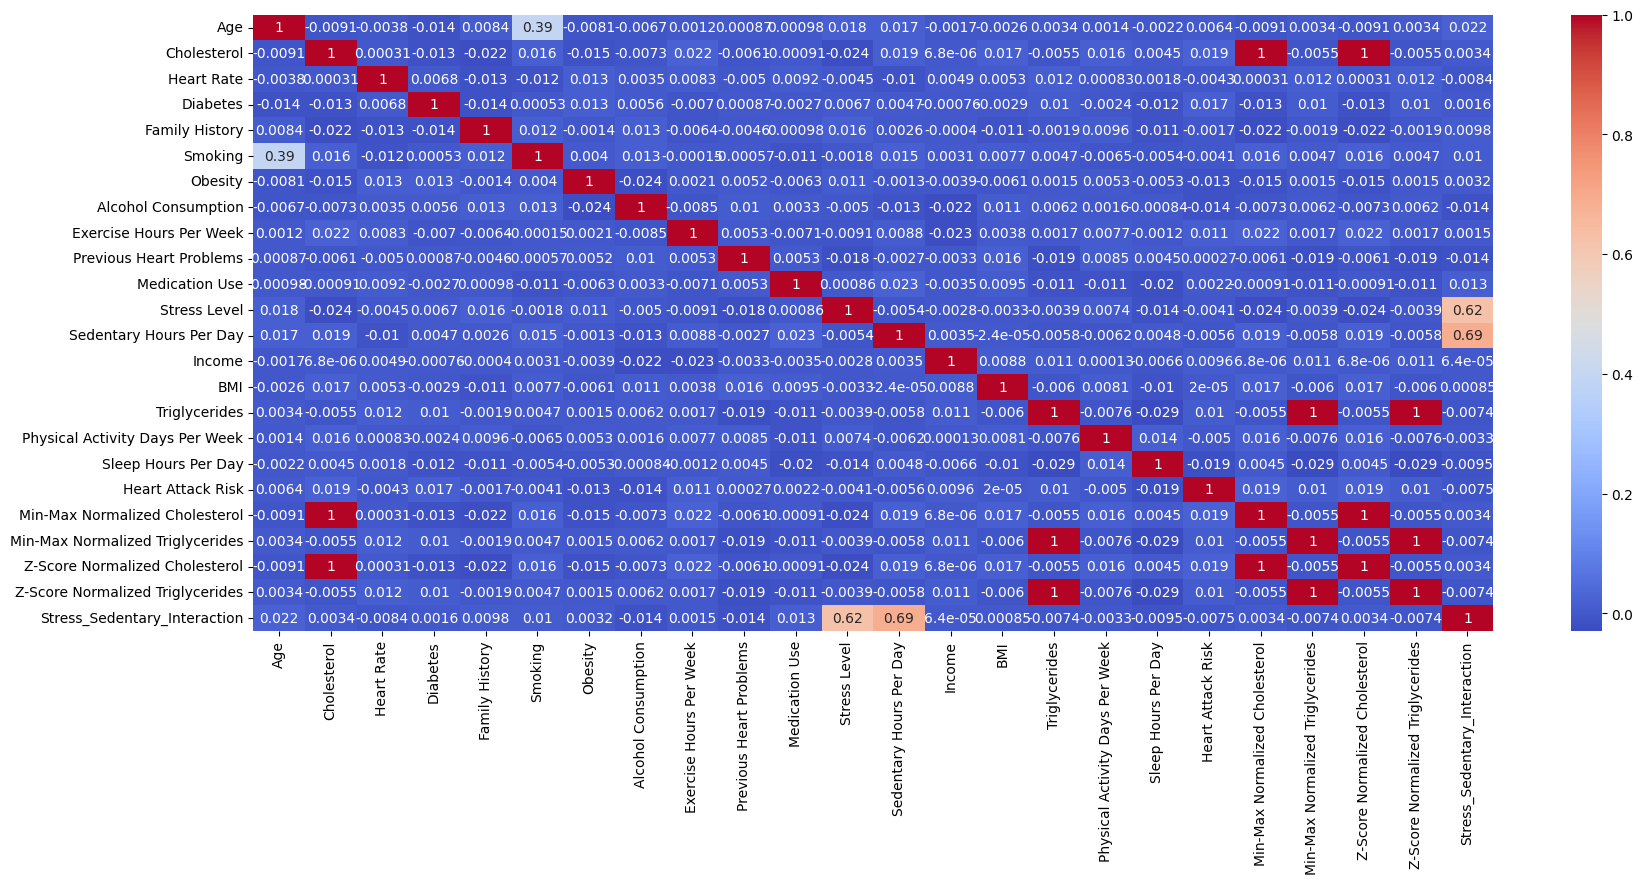

In [23]:
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(20, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

2. Histogram (for Numeric Data):

<ipython-input-24-1d43c2b8acf0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numeric_features.hist(ax=ax)


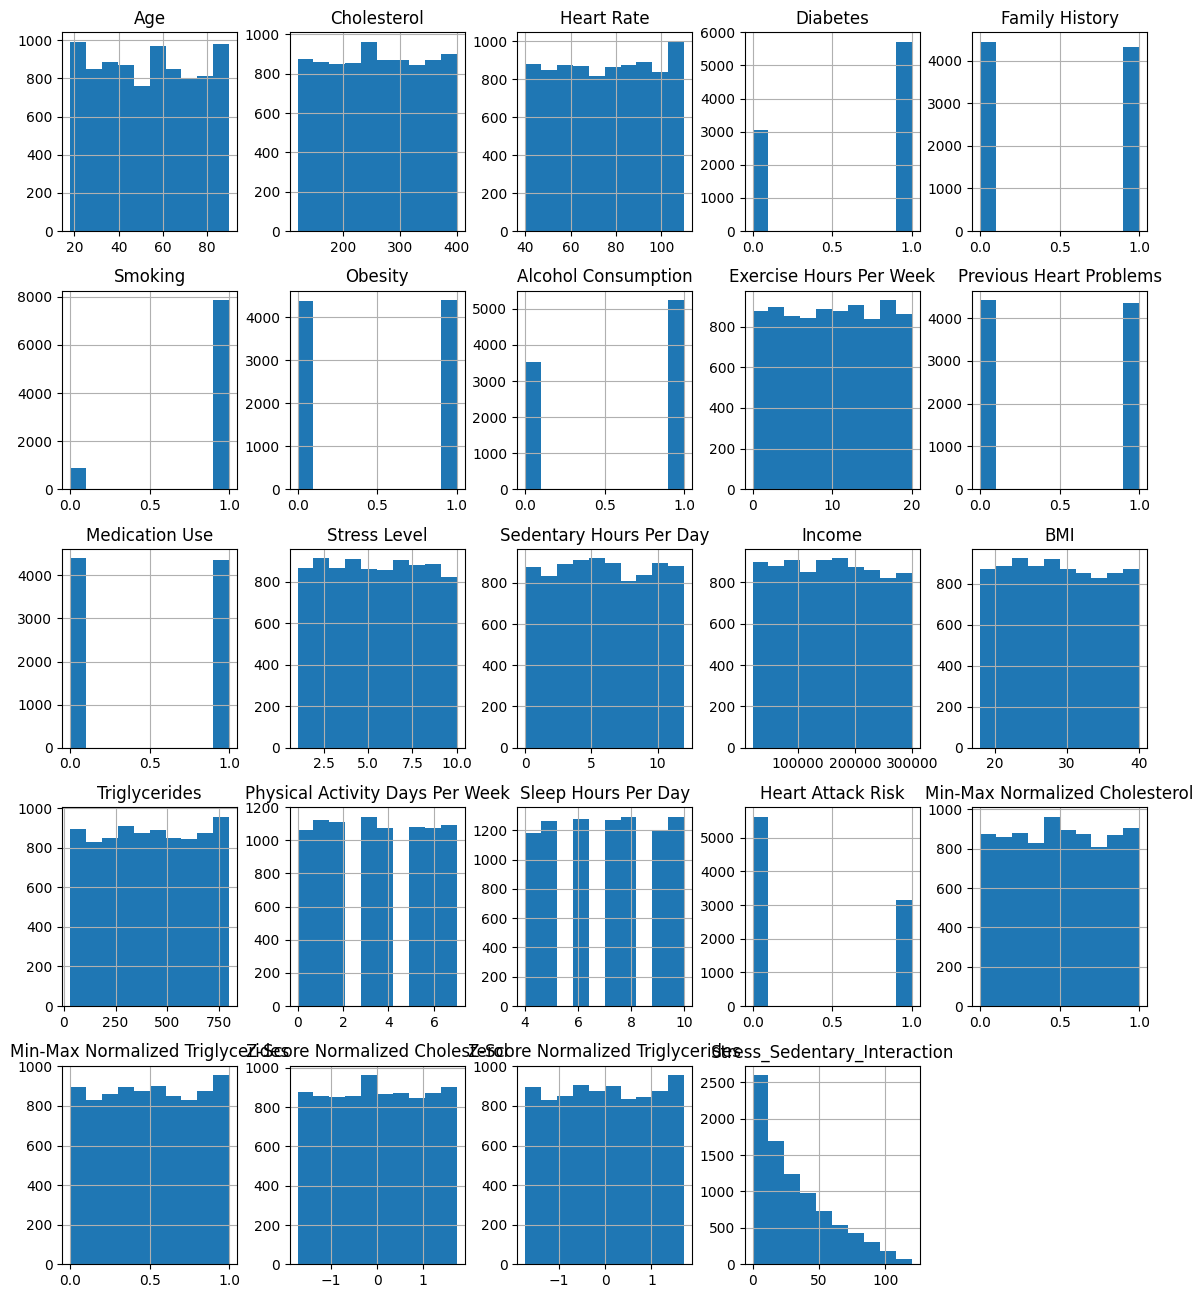

In [24]:
fig, ax = plt.subplots(figsize=(14, 16))

numeric_features.hist(ax=ax)
ax.set_title('Your Histogram Title', fontsize=16)  # Adjust the font size
ax.set_xlabel('X-axis Label', fontsize=12)  # Adjust the font size
ax.set_ylabel('Frequency', fontsize=12)  # Adjust the font size

plt.show()

3. Categorical

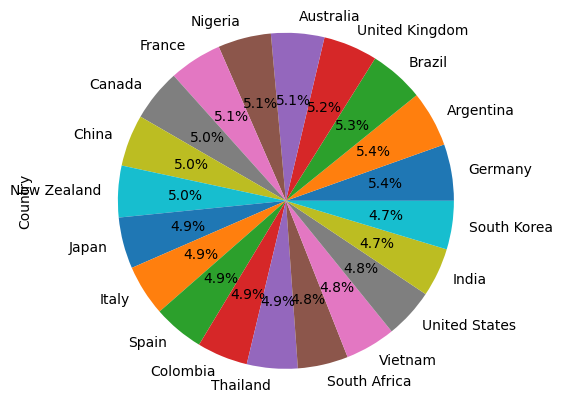

In [ ]:
df['Country'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

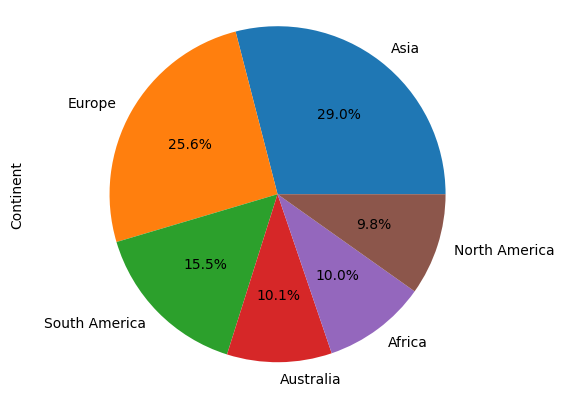

In [ ]:
df['Continent'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

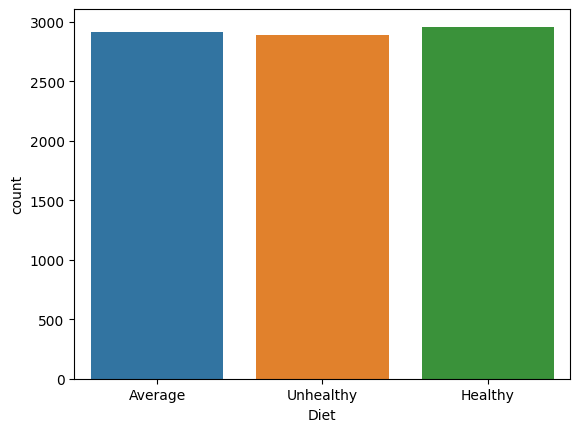

In [ ]:
sns.countplot(x='Diet', data=df)
plt.show()

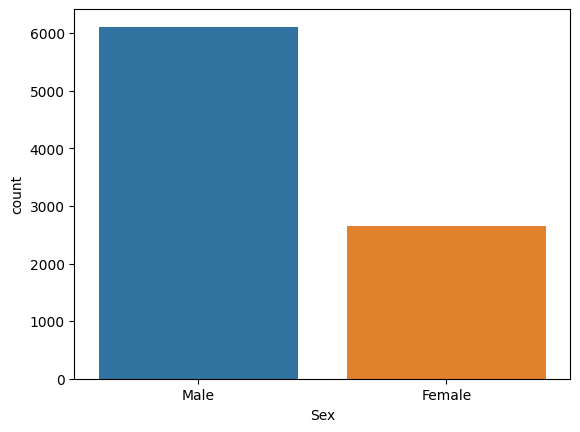

In [ ]:
sns.countplot(x='Sex', data=df)
plt.show()